In [57]:
import numpy as np
import matplotlib.pyplot as plt

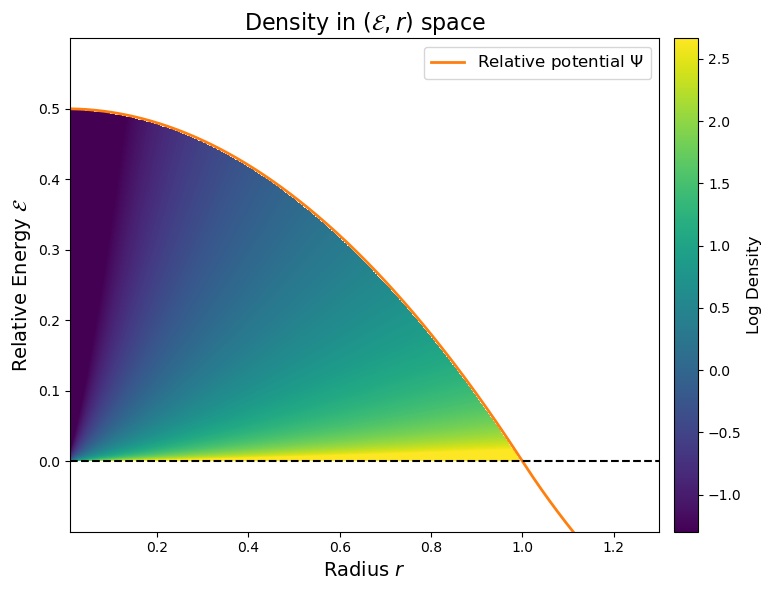

In [58]:
# Constants
G = 1.0       # Gravitational constant (arbitrary units)
M = 1.0       # Total mass of the system (arbitrary units)
R = 1.0       # Radius of the homogeneous sphere (arbitrary units)
rho0 = 1.0    # Constant density inside the sphere
r0 = R        # Reference radius (same as R)

nr = int(1e+4)
rr = np.array([1e-2, 1.3*R])

# Define potential function for a homogeneous sphere
def homogeneous_sphere_potential(r):
    Phi = np.zeros_like(r)
    inside = r <= R
    outside = r > R
    # Potential inside the sphere
    Phi[inside] = - (G * M) / (2 * R) * (3 - (r[inside]**2) / R**2)
    # Potential outside the sphere
    Phi[outside] = - (G * M) / r[outside]
    return Phi

# Define relative potential function
def relative_potential(r):
    Phi = homogeneous_sphere_potential(r)
    Phi_R = homogeneous_sphere_potential(np.array([R]))[0]
    return -Phi + Phi_R

# Create radial distances array
r = np.linspace(rr[0], rr[1], nr)  # Avoid r = 0 to prevent singularity

# Corresponding relative potential
Psi = relative_potential(r)

# Create energies array
E_min = 1e-3  # Increased minimum energy to avoid overflows
E = np.linspace(E_min, Psi.max(), 500)

# Generate 2D density distribution in (E, r) space
R_grid, E_grid = np.meshgrid(r, E)
df = E_grid**(-1.5)*R_grid**2
Psi_r = relative_potential(R_grid)
mask = E_grid >= Psi_r
df[mask] = np.nan

# Apply log stretch
df = np.log10(df)
vmin, vmax = np.nanpercentile(df, np.array([10,98]))

# Plot the 2D density distribution
plt.figure(figsize=(8, 6))
extent = [rr[0], rr[1], E_min, Psi.max()]
im = plt.imshow(df, extent=extent, origin='lower', aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)

# Add colorbar
cbar = plt.colorbar(im, orientation='vertical', pad=0.02)
cbar.set_label('Log Density', fontsize=12)

plt.plot(r, Psi, linewidth=2, color='tab:orange', label = 'Relative potential $\Psi$')
psi_max = np.max(Psi_r)
plt.ylim(-0.2*psi_max, 1.2*psi_max)
plt.hlines(0, rr[0], rr[1], color='black', linestyle='--')

plt.legend(fontsize=12)
plt.xlabel('Radius $r$', fontsize=14)
plt.ylabel('Relative Energy ${\cal E}$', fontsize=14)
plt.title(r'Density in (${\cal E}, r$) space', fontsize=16)
plt.tight_layout()

plt.savefig("../Figures/homogeneous_sphere_df_of_er.png", format="png", dpi=300, 
            facecolor='white', bbox_inches='tight')

plt.show()

/var/folders/rl/0098rf6x3f16rk8j5c1d89xr0000gn/T/ipykernel_62552/2751358277.py:21: RuntimeWarning: divide by zero encountered in log10
  df_log = np.log10(df)
/var/folders/rl/0098rf6x3f16rk8j5c1d89xr0000gn/T/ipykernel_62552/2751358277.py:34: RuntimeWarning: invalid value encountered in sqrt
  v_escape = np.sqrt(2 * relative_potential(r))


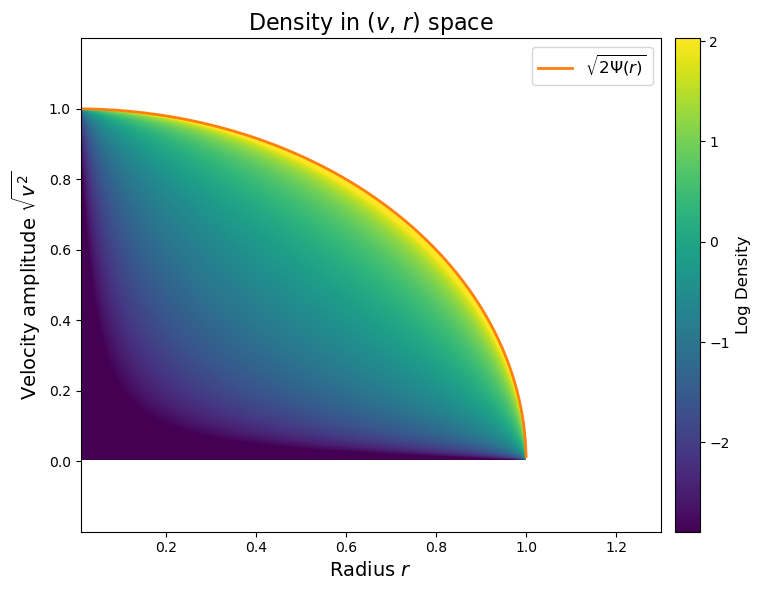

In [59]:

# Define velocities array
v_max = np.sqrt(2 * Psi.max())
v = np.linspace(0, v_max, 500)

# Generate 2D density distribution in (v, r) space
R_grid, V_grid = np.meshgrid(r, v)

# Relative potential at grid points
Psi_r = relative_potential(R_grid)

# Compute relative energy
E_grid = Psi_r - 0.5 * V_grid**2

# Compute distribution function df
df = np.zeros_like(E_grid)
mask = E_grid > 0
df[mask] = E_grid[mask]**(-1.5) * R_grid[mask]**2 * V_grid[mask]**2
df[~mask] = np.nan  # Set df to NaN where E_grid <= 0

# Apply log stretch
df_log = np.log10(df)
vmin, vmax = np.nanpercentile(df_log, np.array([10,98]))

# Plot the 2D density distribution
plt.figure(figsize=(8, 6))
extent = [rr[0], rr[1], 0, v_max]
im = plt.imshow(df_log, extent=extent, origin='lower', aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)

# Add colorbar
cbar = plt.colorbar(im, orientation='vertical', pad=0.02)
cbar.set_label('Log Density', fontsize=12)

# Plot escape velocity line
v_escape = np.sqrt(2 * relative_potential(r))
plt.plot(r, v_escape, linewidth=2, color='tab:orange', label=r'$\sqrt{2\Psi(r)}$')

plt.ylim(-0.2*v_max, 1.2*v_max)

plt.legend(fontsize=12)
plt.xlabel('Radius $r$', fontsize=14)
plt.ylabel('Velocity amplitude $\sqrt{v^2}$', fontsize=14)
plt.title(r'Density in ($v$, $r$) space', fontsize=16)
plt.tight_layout()

plt.savefig("../Figures/homogeneous_sphere_df_of_vr.png", format="png", dpi=300, 
            facecolor='white', bbox_inches='tight')

plt.show()


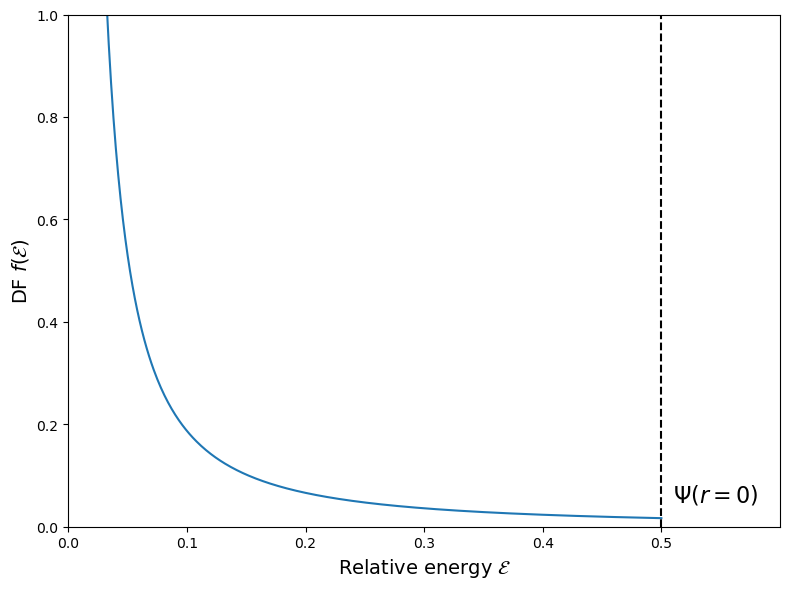

In [60]:
# Plot DF(E)
df_max = 1

# normalising constant
numerator = rho0
denominator = 4 * np.pi**2 * np.sqrt(2) * ((2 * np.pi * G * rho0 / 3)**(1.5)) * r0**3
k = numerator / denominator

plt.figure(figsize=(8, 6))
plt.plot(E, k*E**(-3/2), color='tab:blue') 
plt.ylim(0, df_max)
plt.xlim(0, 1.2*Psi.max())

plt.vlines(Psi.max(), 0, df_max, color='black', linestyle='--')
plt.text(Psi.max()+0.02*Psi.max(), 0.05, r'$\Psi(r=0)$', fontsize=16, color="black")

plt.xlabel('Relative energy ${\cal E}$', fontsize=14)
plt.ylabel('DF $f({\cal E})$', fontsize=14)

plt.tight_layout()

plt.savefig("../Figures/homogeneous_sphere_df_of_e.png", format="png", dpi=300, 
            facecolor='white', bbox_inches='tight')

plt.show()
